# Task 2

---

## Predictive modeling of customer bookings

This Jupyter notebook includes some code to get you started with this predictive modeling task. We will use various packages for data manipulation, feature engineering and machine learning.

### Exploratory data analysis

First, we must explore the data in order to better understand what we have and the statistical properties of the dataset.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

In [ ]:
df = pd.read_csv("/content/customer_booking.csv", encoding="ISO-8859-1")
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0


The `.head()` method allows us to view the first 5 rows in the dataset, this is useful for visual inspection of our columns

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

The `.info()` method gives us a data description, telling us the names of the columns, their data types and how many null values we have. Fortunately, we have no null values. It looks like some of these columns should be converted into different data types, e.g. flight_day.

To provide more context, below is a more detailed data description, explaining exactly what each column means:

- `num_passengers` = number of passengers travelling
- `sales_channel` = sales channel booking was made on
- `trip_type` = trip Type (Round Trip, One Way, Circle Trip)
- `purchase_lead` = number of days between travel date and booking date
- `length_of_stay` = number of days spent at destination
- `flight_hour` = hour of flight departure
- `flight_day` = day of week of flight departure
- `route` = origin -> destination flight route
- `booking_origin` = country from where booking was made
- `wants_extra_baggage` = if the customer wanted extra baggage in the booking
- `wants_preferred_seat` = if the customer wanted a preferred seat in the booking
- `wants_in_flight_meals` = if the customer wanted in-flight meals in the booking
- `flight_duration` = total duration of flight (in hours)
- `booking_complete` = flag indicating if the customer completed the booking

Before we compute any statistics on the data, lets do any necessary data conversion

In [ ]:
df["flight_day"].unique()

array(['Sat', 'Wed', 'Thu', 'Mon', 'Sun', 'Tue', 'Fri'], dtype=object)

In [ ]:
mapping = {
    "Mon": 1,
    "Tue": 2,
    "Wed": 3,
    "Thu": 4,
    "Fri": 5,
    "Sat": 6,
    "Sun": 7,
}

df["flight_day"] = df["flight_day"].map(mapping)

In [ ]:
df["flight_day"].unique()

array([6, 3, 4, 1, 7, 2, 5])

In [ ]:
df.describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,3.814420,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,1.992792,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,1.000000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,2.000000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,4.000000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,5.000000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,7.000000,1.000000,1.000000,1.000000,9.500000,1.000000


The `.describe()` method gives us a summary of descriptive statistics over the entire dataset (only works for numeric columns). This gives us a quick overview of a few things such as the mean, min, max and overall distribution of each column.

From this point, you should continue exploring the dataset with some visualisations and other metrics that you think may be useful. Then, you should prepare your dataset for predictive modelling. Finally, you should train your machine learning model, evaluate it with performance metrics and output visualisations for the contributing variables. All of this analysis should be summarised in your single slide.

In [ ]:
df.head(10)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,6,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,3,AKLDEL,India,1,0,1,5.52,0
5,1,Internet,RoundTrip,3,48,20,4,AKLDEL,New Zealand,1,0,1,5.52,0
6,3,Internet,RoundTrip,201,33,6,4,AKLDEL,New Zealand,1,0,1,5.52,0
7,2,Internet,RoundTrip,238,19,14,1,AKLDEL,India,1,0,1,5.52,0
8,1,Internet,RoundTrip,80,22,4,1,AKLDEL,New Zealand,0,0,1,5.52,0
9,1,Mobile,RoundTrip,378,30,12,7,AKLDEL,India,0,0,0,5.52,0


**Steps**
1. Checking if the data target is balanced.
2. Taking care of categorical data.
3. Drop columns that aren't useful. (using Corrolation)
4. Divide the data set into training data and test data.

# 1. Checking if the data target is balanced.

In [ ]:
df.booking_complete.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

**===> Unbalanced dataset: we will apply aversampling and undersampling methods later for the train set.**

# 2. Feature Engineering: Taking care of categorical data.

#### Converting the sales_channel feature:

In [ ]:
df.sales_channel.value_counts()

Internet    44382
Mobile       5618
Name: sales_channel, dtype: int64

In [ ]:
mapping_sales_channel = {
    "Internet": 1,
    "Mobile": 2,
}

df["sales_channel"] = df["sales_channel"].map(mapping_sales_channel)

In [ ]:
df["sales_channel"].value_counts()

1    44382
2     5618
Name: sales_channel, dtype: int64

In [ ]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,RoundTrip,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,RoundTrip,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,RoundTrip,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


#### converting the trip_type feature:

In [ ]:
df['trip_type'].value_counts()

RoundTrip     49497
OneWay          387
CircleTrip      116
Name: trip_type, dtype: int64

In [ ]:
df['trip_type'].unique()

array(['RoundTrip', 'CircleTrip', 'OneWay'], dtype=object)

In [ ]:
mapping_trip_type = {
    "RoundTrip": 1,
    "CircleTrip": 2,
    "OneWay": 3,
}

df["trip_type"] = df["trip_type"].map(mapping_trip_type)

In [ ]:
df["trip_type"].value_counts()

1    49497
3      387
2      116
Name: trip_type, dtype: int64

In [ ]:
df.head(3)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,1,1,262,19,7,6,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,1,1,112,20,3,6,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,1,1,243,22,17,3,AKLDEL,India,1,1,0,5.52,0


### converting the route feature

In [ ]:
df.route.value_counts()

AKLKUL    2680
PENTPE     924
MELSGN     842
ICNSIN     801
DMKKIX     744
          ... 
LBUTPE       1
CXRMEL       1
DELKBR       1
KOSSYD       1
MRUXIY       1
Name: route, Length: 799, dtype: int64

**Target Encoding**

It consists of substituting each group in a categorical feature with the average response in the target variable.

In [ ]:
encodings = df.groupby('route')['booking_complete'].mean().reset_index()
df = df.merge(encodings, how='left', on='route')
df.drop('route', axis=1, inplace=True)

In [ ]:
df.sample(5)

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete_x,booking_complete_y
34434,1,1,1,7,4,15,3,Taiwan,0,0,0,4.67,0,0.433983
38559,1,1,1,6,5,12,2,Australia,1,1,1,8.58,0,0.034682
9237,1,1,1,4,53,6,4,Australia,1,0,1,8.83,0,0.061069
39627,6,2,1,85,5,7,1,Indonesia,0,0,0,6.62,0,0.127273
27763,1,2,1,3,3,1,4,Malaysia,0,1,0,7.57,0,0.221719


In [ ]:
df = df.rename(columns={"booking_complete_y": "route", "booking_complete_x": "booking_complete"})

In [ ]:
df.route.value_counts()

0.000000    2725
0.211567    2680
0.433983     924
0.051069     842
0.021739     828
            ... 
0.444444       9
0.750000       8
0.833333       6
0.800000       5
0.600000       5
Name: route, Length: 301, dtype: int64

### converting booking_origin feature

In [ ]:
df.booking_origin.value_counts()

Australia               17872
Malaysia                 7174
South Korea              4559
Japan                    3885
China                    3387
                        ...  
Panama                      1
Tonga                       1
Tanzania                    1
Bulgaria                    1
Svalbard & Jan Mayen        1
Name: booking_origin, Length: 104, dtype: int64

In [ ]:
encodings = df.groupby('booking_origin')['booking_complete'].mean().reset_index()
df = df.merge(encodings, how='left', on='booking_origin')
df.drop('booking_origin', axis=1, inplace=True)

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route,booking_origin
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.0,0.050279
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.0,0.050279
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.0,0.103150
3,1,1,1,96,31,4,6,0,0,1,5.52,0,0.0,0.050279
4,2,1,1,68,22,15,3,1,0,1,5.52,0,0.0,0.103150


In [ ]:
df = df.rename(columns={"booking_complete_y": "booking_origin", "booking_complete_x": "booking_complete"})

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete,route,booking_origin
0,2,1,1,262,19,7,6,1,0,0,5.52,0,0.0,0.050279
1,1,1,1,112,20,3,6,0,0,0,5.52,0,0.0,0.050279
2,2,1,1,243,22,17,3,1,1,0,5.52,0,0.0,0.103150
3,1,1,1,96,31,4,6,0,0,1,5.52,0,0.0,0.050279
4,2,1,1,68,22,15,3,1,0,1,5.52,0,0.0,0.103150


# 3. Drop columns that aren't useful. (using Corrolation)

In [ ]:
df.columns

Index(['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
       'booking_complete', 'route', 'booking_origin'],
      dtype='object')

In [ ]:
df = df[['num_passengers', 'sales_channel', 'trip_type', 'purchase_lead',
       'length_of_stay', 'flight_hour', 'flight_day', 'wants_extra_baggage',
       'wants_preferred_seat', 'wants_in_flight_meals', 'flight_duration',
        'route', 'booking_origin', 'booking_complete']]

In [ ]:
df.head()

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,route,booking_origin,booking_complete
0,2,1,1,262,19,7,6,1,0,0,5.52,0.0,0.050279,0
1,1,1,1,112,20,3,6,0,0,0,5.52,0.0,0.050279,0
2,2,1,1,243,22,17,3,1,1,0,5.52,0.0,0.103150,0
3,1,1,1,96,31,4,6,0,0,1,5.52,0.0,0.050279,0
4,2,1,1,68,22,15,3,1,0,1,5.52,0.0,0.103150,0


In [ ]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')
# 'RdBu_r', 'BrBG_r', & PuOr_r are other good diverging colormaps


,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,route,booking_origin,booking_complete
num_passengers,1.000000,-0.002457,-0.002398,0.212606,-0.115850,0.015607,0.015407,0.120404,0.028544,0.022943,-0.063169,0.061371,0.083193,0.024116
sales_channel,-0.002457,1.000000,-0.020929,-0.013399,-0.060352,0.022375,0.042095,-0.054254,0.032943,-0.022235,-0.038629,0.026251,0.051278,-0.041060
trip_type,-0.002398,-0.020929,1.000000,0.007691,-0.011779,0.003194,-0.001262,0.010716,-0.007786,-0.014732,0.043418,-0.050083,-0.028327,-0.027215
purchase_lead,0.212606,-0.013399,0.007691,1.000000,-0.076560,0.035973,0.036531,-0.022207,-0.004499,-0.022653,0.067866,0.009727,0.036063,-0.022131
length_of_stay,-0.115850,-0.060352,-0.011779,-0.076560,1.000000,-0.024872,-0.000310,0.176757,0.032264,0.098828,0.141181,-0.086217,-0.066385,-0.042408
flight_hour,0.015607,0.022375,0.003194,0.035973,-0.024872,1.000000,0.024086,-0.011434,0.012171,0.013014,-0.002101,-0.006399,-0.006279,0.007127
flight_day,0.015407,0.042095,-0.001262,0.036531,-0.000310,0.024086,1.000000,-0.002503,0.005392,0.009281,0.018434,-0.001810,-0.001829,-0.006986
wants_extra_baggage,0.120404,-0.054254,0.010716,-0.022207,0.176757,-0.011434,-0.002503,1.000000,0.207669,0.216470,0.057054,-0.005026,0.024148,0.068139
wants_preferred_seat,0.028544,0.032943,-0.007786,-0.004499,0.032264,0.012171,0.005392,0.207669,1.000000,0.315088,0.101289,-0.032025,-0.036429,0.050116
wants_in_flight_meals,0.022943,-0.022235,-0.014732,-0.022653,0.098828,0.013014,0.009281,0.216470,0.315088,1.000000,0.154312,-0.073747,-0.084773,0.026511


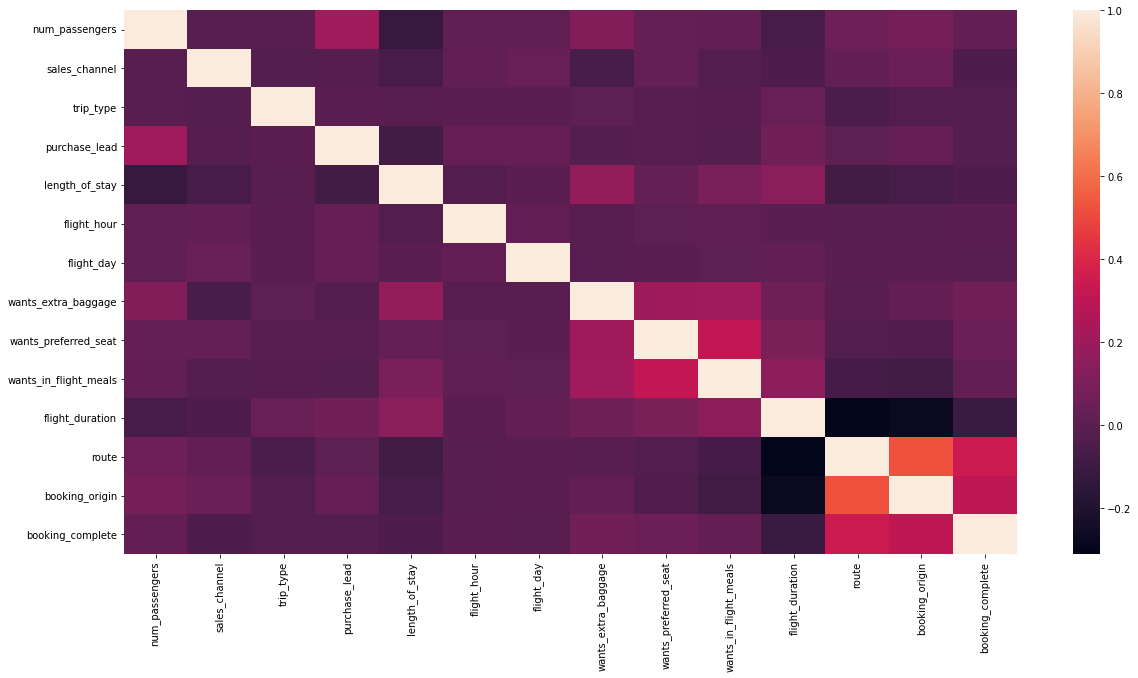

In [ ]:
plt.figure(figsize=(20,10))
sns.heatmap(corr)

I decide to keep all the varaibles.

# 4. Divide the data set into training data and test data.

The rule of thumb is: never mess up with your test set.

Before attempting oversampling or undersampling approaches, ALWAYS separate your data into test and train sets!

In [ ]:
X = df.drop('booking_complete', axis=1)
y = df['booking_complete']

In [ ]:
y.value_counts()

0    42522
1     7478
Name: booking_complete, dtype: int64

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size = 0.3, random_state = 42)

Time do apply some changes on our training dataset:
1. Feautures scaling
2. Oversmapling and undersampling using SMOTE-RUS Implementation 

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [ ]:
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline

over = SMOTE()
under = RandomUnderSampler()
steps = [('o', over), ('u', under)]
pipeline = Pipeline(steps=steps)

# transform the dataset using the SMOTE-RUS technique
X_train_new, y_train_new = pipeline.fit_resample(X_train_scaled, y_train)

In [ ]:
print('Data has been balanced from both the classes \n', y_train_new.value_counts())

Data has been balanced from both the classes 
 0    29765
1    29765
Name: booking_complete, dtype: int64


# 5. Model Training

## 5.1 RandomForest Classifier

### 5.1.1 fitting the model scaled and oversampled dataset

In [ ]:
from sklearn.ensemble import RandomForestClassifier

model1= RandomForestClassifier()
model1=model1.fit(X_train_new,y_train_new)

In [ ]:
y_pred = model1.predict(X_test_scaled)

In [ ]:
y_test.value_counts()

0    12757
1     2243
Name: booking_complete, dtype: int64

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
target_names=['Completed_Booking', 'Uncompleted_Booking']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

  Completed_Booking       0.89      0.93      0.91     12757
Uncompleted_Booking       0.43      0.32      0.37      2243

           accuracy                           0.84     15000
          macro avg       0.66      0.62      0.64     15000
       weighted avg       0.82      0.84      0.83     15000



### 5.1.2 fitting the model non-processed data

In [ ]:
model1= RandomForestClassifier()
model1=model1.fit(X_train,y_train)

In [ ]:
y_pred = model1.predict(X_test)

In [ ]:
target_names=['Completed_Booking', 'Uncompleted_Booking']
print(classification_report(y_test, y_pred, target_names=target_names))

                     precision    recall  f1-score   support

  Completed_Booking       0.87      0.97      0.92     12757
Uncompleted_Booking       0.53      0.17      0.25      2243

           accuracy                           0.85     15000
          macro avg       0.70      0.57      0.59     15000
       weighted avg       0.82      0.85      0.82     15000



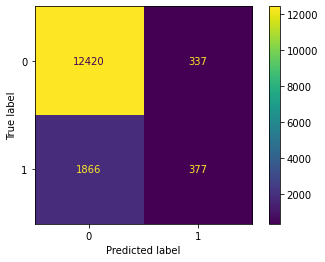

In [ ]:
from matplotlib import pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model1.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model1.classes_)
disp.plot()

plt.show()

## 5.2 XgBoost Classifier

### 5.2.1 fitting the model scaled and oversampled dataset

In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve

model_xg = XGBClassifier().fit(X_train_new, y_train_new)
y_pred_xgb= model_xg.predict(X_test_scaled)
probs_xg = model_xg.predict_proba(X_test_scaled)[:, 1]

In [ ]:
y_test_int = y_test.replace({'Completed_Booking' : 1, 'Uncompleted_Booking': 0})
auc_xg = roc_auc_score(y_test_int, probs_xg)
fpr_xg, tpr_xg, thresholds_xg = roc_curve(y_test_int, probs_xg)

In [ ]:
print(classification_report(y_test, y_pred_xgb, target_names= target_names))

                     precision    recall  f1-score   support

  Completed_Booking       0.91      0.83      0.87     12757
Uncompleted_Booking       0.37      0.55      0.44      2243

           accuracy                           0.79     15000
          macro avg       0.64      0.69      0.66     15000
       weighted avg       0.83      0.79      0.81     15000



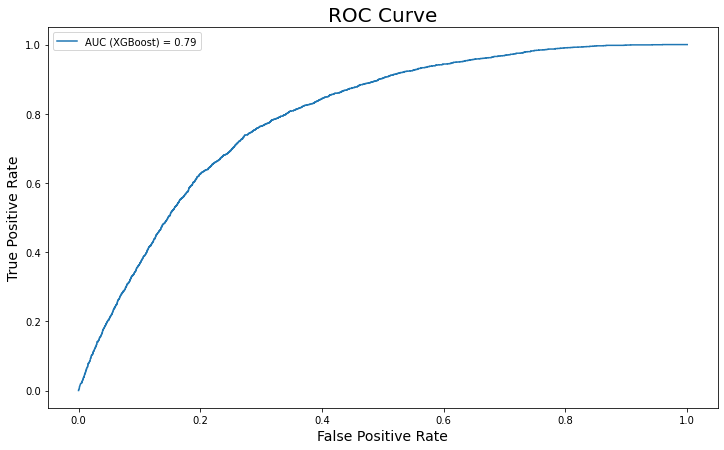

In [ ]:
plt.figure(figsize=(12, 7))
plt.plot(fpr_xg, tpr_xg, label=f'AUC (XGBoost) = {auc_xg:.2f}')

plt.title('ROC Curve', size=20)
plt.xlabel('False Positive Rate', size=14)
plt.ylabel('True Positive Rate', size=14)
plt.legend();

### 5.2.2 fitting the model non-processed data

In [ ]:
model2=XGBClassifier()
model2.fit(X_train,y_train)

XGBClassifier()

In [ ]:
y_pred_xgb = model2.predict(X_test)

In [ ]:
print(classification_report(y_test, y_pred_xgb, target_names=target_names))

                     precision    recall  f1-score   support

  Completed_Booking       0.86      0.99      0.92     12757
Uncompleted_Booking       0.55      0.07      0.12      2243

           accuracy                           0.85     15000
          macro avg       0.71      0.53      0.52     15000
       weighted avg       0.81      0.85      0.80     15000



## 5.3 CatBoost Binary classifier

### 5.3.1 fitting the model non-processed data

In [ ]:
pip install catboost

In [ ]:
import catboost as ctb
from sklearn import metrics

In [ ]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train, y_train)
print(model_CBC)

In [ ]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.87      0.98      0.92     12757
           1       0.53      0.14      0.23      2243

    accuracy                           0.85     15000
   macro avg       0.70      0.56      0.57     15000
weighted avg       0.82      0.85      0.82     15000

[[12467   290]
 [ 1919   324]]


### 5.3.2 fitting the model scaled and oversampled dataset

In [ ]:
model_CBC = ctb.CatBoostClassifier()
model_CBC.fit(X_train_new, y_train_new)
print(model_CBC)

In [ ]:
expected_y  = y_test
predicted_y = model_CBC.predict(X_test)

In [ ]:
print(metrics.classification_report(expected_y, predicted_y))
print(metrics.confusion_matrix(expected_y, predicted_y))

              precision    recall  f1-score   support

           0       0.84      0.86      0.85     12757
           1       0.11      0.11      0.11      2243

    accuracy                           0.74     15000
   macro avg       0.48      0.48      0.48     15000
weighted avg       0.74      0.74      0.74     15000

[[10920  1837]
 [ 2006   237]]


=> over sampling and undersampling decreased the accuracy of the model

## 6. Conclusion

In this project we dealt with an unbalanced dataset, with large categorical data.

1. We first handled the categorical data by mapping the small level categorical data, and we applyied the Target encoding technique for the large categorica
feautures, also we used the StandardScaler to scale some features.

2. To handle the unbalanced dataset we used oversampling and undersampling techniques to make our train data balanced and ready to be fitted in the model.

Then we trained 3 models:

* RandomForest Classifier
* XgBoost Classifier
* CatBoost Classifier

We trained each model twice, first on the balanced data and second on the original unbalanced data to compare results.

**Model Results**

## 1. RandomForest Classifier

* On balanced data: **Acc** : 0.84  

  **F1-Score** - Completed_Booking: 0.91   | Uncompleted_Booking: 0.37
* On unbalanced data: **Acc** : 0.85 

  **F1-Score** -  Completed_Booking: 0.92  |Uncompleted_Booking: 0.25


## 2. XgBoost Classifier

* On balanced data: **Acc** : 0.79 

  **F1-Score** -  Completed_Booking: 0.87  |Uncompleted_Booking: 0.44
* On unbalanced data: **Acc** : 0.85 

  **F1-Score** -  Completed_Booking: 0.92  |Uncompleted_Booking: 0.12


## 3. CatBoost Classifier

* On balanced data: **Acc** : 0.74 

  **F1-Score** -  Completed_Booking: 0.85  |Uncompleted_Booking: 0.11
* On unbalanced data: **Acc** : 0.85 

  **F1-Score** -  Completed_Booking: 0.95  |Uncompleted_Booking: 0.23

**Final Results**

since we are dealing with unbalanced dataset the Acc metric is not enough to evaluate our model, so we will chose the best model based on it's F1-Score:

Best Model: XgBoost Classifier on Balanced data